IMPORING THE REQUIRED

In [3]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np

In [4]:
import keras

LOADING AND SPITTING THE DATA

In [5]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


In [6]:
print('Training Images: {}'.format(X_train.shape))
print('Testing Images: {}'.format(X_test.shape))

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


In [7]:
print(X_train[0].shape)

(32, 32, 3)


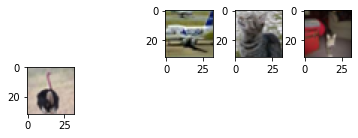

In [8]:
for i in range(332,336):
    plt.subplot(120+ 1 + i)
    img = X_train[i]
    plt.imshow(img)
    plt.show

PREPROCESSING THE DATA

In [9]:
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [10]:
X_train /= 255
X_test /= 255
n_classes = 10

In [11]:
print("Shape before one-hot encoding: ",y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)


BUILDING THE MODEL

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten


model = Sequential()
#convolutional layers
model.add(Conv2D(50, kernel_size = (3,3), strides = (1, 1), padding = 'same', activation = 'relu', input_shape = (32, 32, 3)))


model.add(Conv2D(75, kernel_size = (3, 3), strides = (1, 1), padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))


model.add(Flatten())


# Hidden layer
model.add(Dense(500, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation = 'relu'))
model.add(Dropout(0.3))
# Output layer
model.add(Dense(10, activation = 'softmax'))


# Compiling
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')


# Training the model
model.fit(X_train, Y_train, batch_size = 128, epochs = 10, validation_data = (X_test, Y_test)) 

Epoch 1/10
391/391 [==============================] - 286s 730ms/step - loss: 1.5242 - accuracy: 0.4449 - val_loss: 1.1480 - val_accuracy: 0.5902
Epoch 2/10
391/391 [==============================] - 285s 730ms/step - loss: 1.1241 - accuracy: 0.6029 - val_loss: 1.0467 - val_accuracy: 0.6309
Epoch 3/10
391/391 [==============================] - 286s 731ms/step - loss: 0.9493 - accuracy: 0.6680 - val_loss: 0.8957 - val_accuracy: 0.6795
Epoch 4/10
391/391 [==============================] - 287s 734ms/step - loss: 0.8329 - accuracy: 0.7100 - val_loss: 0.8626 - val_accuracy: 0.7022
Epoch 5/10
391/391 [==============================] - 287s 733ms/step - loss: 0.7311 - accuracy: 0.7438 - val_loss: 0.8188 - val_accuracy: 0.7161
Epoch 6/10
391/391 [==============================] - 287s 735ms/step - loss: 0.6443 - accuracy: 0.7723 - val_loss: 0.8375 - val_accuracy: 0.7130
Epoch 7/10
391/391 [==============================] - 287s 735ms/step - loss: 0.5587 - accuracy: 0.8031 - val_loss: 0.8293 -

PREDICTING

In [14]:
classes = (0, 10)

names = ['airplane',
         'automobie',
         'bird',
         'cat',
         'deer',
         'dog',
         'frog',
         'horse',
         'ship',
         'truck']


class_labels = dict(zip(classes, names))

batch = X_test[100:109]
labels = np.argmax(Y_test[100:109], axis = -1)

predictions = model.predict(batch, verbose = 1)

1/1 [==============================] - 0s 108ms/step


In [15]:
print (predictions)

[[2.72159552e-04 3.04737565e-04 2.20125522e-02 3.57814766e-02
  7.48367548e-01 1.17599212e-01 4.29993793e-02 3.17936242e-02
  4.27549327e-04 4.41850454e-04]
 [7.23108940e-04 8.06091120e-04 1.82143804e-02 1.87867433e-01
  1.65313371e-02 7.27289379e-01 2.63469797e-02 2.00315155e-02
  1.08742830e-03 1.10229873e-03]
 [1.65776805e-06 1.84744113e-05 1.87810874e-04 5.21118578e-04
  2.62586718e-06 5.11887716e-04 9.98744011e-01 1.00782445e-05
  1.52048199e-06 8.37790083e-07]
 [1.04629653e-05 7.18259935e-06 1.90805166e-03 3.41439873e-01
  3.02524213e-03 5.52192330e-03 6.47744119e-01 1.76072412e-04
  1.25540682e-04 4.16381954e-05]
 [2.57481076e-08 9.99903083e-01 1.85277903e-14 1.89963774e-11
  1.02372836e-15 9.93076945e-14 8.18351035e-16 6.91090794e-13
  8.80934703e-09 9.68614404e-05]
 [4.74606651e-07 9.95507002e-01 1.18756949e-09 2.87723925e-08
  1.62961294e-11 7.05779324e-11 3.99460881e-10 2.78798008e-13
  4.43448219e-03 5.80047490e-05]
 [3.31867719e-03 4.89007495e-03 2.09829081e-02 4.58051056e

In [16]:
for image in predictions:
    print(np.sum(image))

1.0000001
1.0
1.0000001
1.0000001
0.99999994
1.0
1.0
0.9999998
1.0


In [17]:
class_result = np.argmax(predictions, axis = -1)
print (class_result)

[4 5 6 6 1 1 3 6 8]


FINAL OBJECT DETECTION

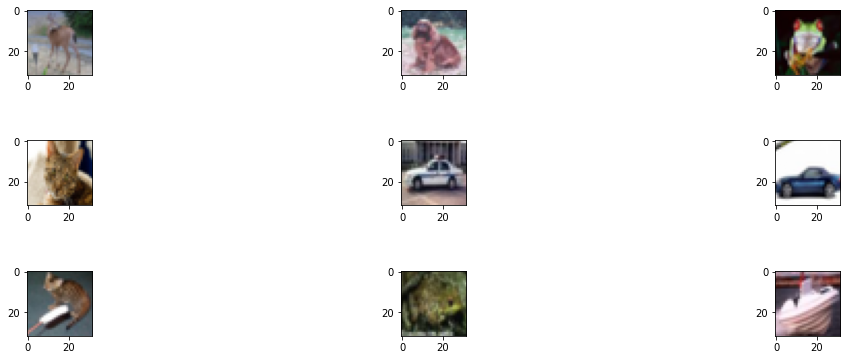

In [18]:
fig, axs = plt.subplots(3, 3, figsize = (19,6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i, img in enumerate(batch):
    for key, value in class_labels.items():
        if class_result[i] == key:
            title = 'Prediction: {}\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)

    #plot the image
    axs[i].imshow(img)

#show the plot
plt.show()